In [11]:
!pip install pandas

import pandas as pn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime



In [4]:
df = pn.read_csv('retail_sales_dataset.csv', sep = ';')

In [23]:
df

,transaction_id,date_name,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount
0,1,24.11.2023,CUST001,Male,34,Beauty,3,50,150
1,2,27.02.2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13.01.2023,CUST003,Male,50,Electronics,1,30,30
3,4,21.05.2023,CUST004,Male,37,Clothing,1,500,500
4,5,06.05.2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,16.05.2023,CUST996,Male,62,Clothing,1,50,50
996,997,17.11.2023,CUST997,Male,52,Beauty,3,30,90
997,998,29.10.2023,CUST998,Female,23,Beauty,4,25,100
998,999,05.12.2023,CUST999,Female,36,Electronics,3,50,150


In [35]:
print(df['product_category'].value_counts(), 
      df['gender'].value_counts(),
      df['age'].value_counts())

product_category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64 gender
Female    510
Male      490
Name: count, dtype: int64 age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
23    24
40    24
50    23
27    23
52    22
60    22
30    22
26    22
31    22
35    22
28    21
41    21
18    21
55    21
20    21
19    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
63    17
45    17
59    17
53    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64


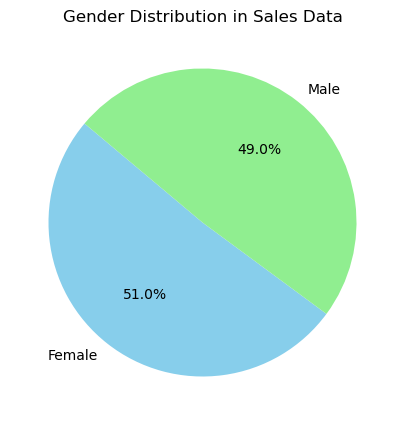

In [53]:
gender_counts = df['gender'].value_counts()
#explode = (0, 0.1)
plt.figure(figsize=(10, 5))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Gender Distribution in Sales Data')
plt.show()

In [5]:
def age_group(age):
    if age <= 25:
        return '18-25'
    elif age > 25 and age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 55:
        return '46-55'
    else:
        return '56-65'

# Apply age_group function to create a new column 'AgeGroup'
df['AgeGroup'] = df['age'].apply(age_group)

# Group by AgeGroup and count occurrences
age_group_counts = df['AgeGroup'].value_counts()

print(age_group_counts)
df

AgeGroup
46-55    229
26-35    205
36-45    202
56-65    195
18-25    169
Name: count, dtype: int64


,transaction_id,date_name,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,AgeGroup
0,1,24.11.2023,CUST001,Male,34,Beauty,3,50,150,26-35
1,2,27.02.2023,CUST002,Female,26,Clothing,2,500,1000,26-35
2,3,13.01.2023,CUST003,Male,50,Electronics,1,30,30,46-55
3,4,21.05.2023,CUST004,Male,37,Clothing,1,500,500,36-45
4,5,06.05.2023,CUST005,Male,30,Beauty,2,50,100,26-35
...,...,...,...,...,...,...,...,...,...,...
995,996,16.05.2023,CUST996,Male,62,Clothing,1,50,50,56-65
996,997,17.11.2023,CUST997,Male,52,Beauty,3,30,90,46-55
997,998,29.10.2023,CUST998,Female,23,Beauty,4,25,100,18-25
998,999,05.12.2023,CUST999,Female,36,Electronics,3,50,150,36-45


In [7]:
grouped = df.groupby(['gender', 'AgeGroup']).agg({'total_amount': 'sum'}).reset_index()
print(grouped)

   gender AgeGroup  total_amount
0  Female    18-25         39470
1  Female    26-35         55115
2  Female    36-45         46735
3  Female    46-55         53310
4  Female    56-65         38210
5    Male    18-25         45080
6    Male    26-35         43365
7    Male    36-45         45135
8    Male    46-55         47380
9    Male    56-65         42200


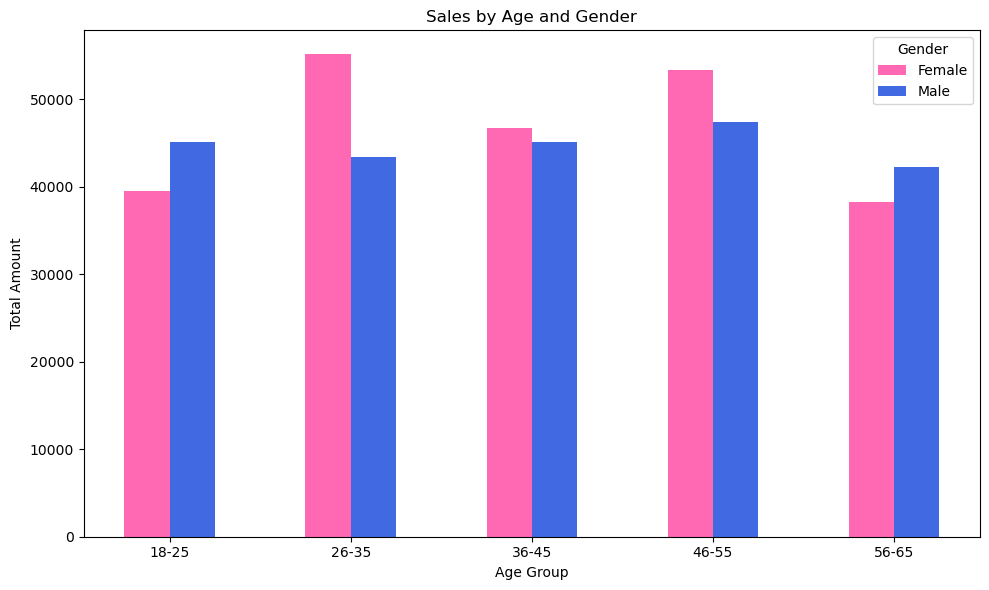

In [12]:
pivot_df = grouped.pivot(index='AgeGroup', columns='gender', values='total_amount').fillna(0)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Define the number of bars per group

index = np.arange(len(pivot_df))
bar_width = 0.25

# Bar positions
bar_positions = [index + bar_width * i for i in range(len(pivot_df.columns))]

colors = ['#FF69B4','#4169E1']
# Plot each gender's bars
for i, gender in enumerate(pivot_df.columns):
    ax.bar(bar_positions[i], pivot_df[gender], bar_width, label=gender, color=colors[i])

# Add labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Total Amount')
ax.set_title('Sales by Age and Gender')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(pivot_df.index)
ax.legend(title='Gender')


# Show plot
plt.tight_layout()
plt.show()
